# Assignment 4

<font color=darkblue>
    
In this assignment, you will predict credit card users churn. You have been tasked to help a bank predict who is likely to cancel their credit card by building and evaluating a classification model.

You will perform some EDA, followed by data prep, model building, and performance evaluation. You will then summarize your findings and select your best performing model.

1. Exploratory Data Analysis (EDA)
2. Data Preparation
3. Model Building
4. Performance Evaluation
5. Model Selection

Enter your code along with any comments for each question.


## Data Discovery

### Data Description
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

### Importing Libraries

In [ ]:
!pip install scikit-learn==1.1.1
#updating and installing scikit learn
#to support most of the libraries and packages.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### Loading Data

In [ ]:
churn = pd.read_csv("BankChurners.csv")

In [ ]:
# Checking the number of rows and columns in the data
churn.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns

### Data Overview

In [ ]:
# let's create a copy of the data
data = churn.copy()

In [ ]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


In [ ]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00000,1851,2152.00000,0.70300,15476,117,0.85700,0.46200
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00000,2186,2091.00000,0.80400,8764,69,0.68300,0.51100
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00000,0,5409.00000,0.81900,10291,60,0.81800,0.00000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.00000,0,5281.00000,0.53500,8395,62,0.72200,0.00000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.00000,1961,8427.00000,0.70300,10294,61,0.64900,0.18900


In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are no null values in the Education_Level and Marital_Status
* 5 columns are of object type rest all are numerical.

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

In [ ]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.00000
Attrition_Flag              0.00000
Customer_Age                0.00000
Gender                      0.00000
Dependent_count             0.00000
Education_Level            15.00000
Marital_Status              7.40000
Income_Category             0.00000
Card_Category               0.00000
Months_on_book              0.00000
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      0.00000
Contacts_Count_12_mon       0.00000
Credit_Limit                0.00000
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             0.00000
Total_Amt_Chng_Q4_Q1        0.00000
Total_Trans_Amt             0.00000
Total_Trans_Ct              0.00000
Total_Ct_Chng_Q4_Q1         0.00000
Avg_Utilization_Ratio       0.00000
dtype: float64

- Education_Level has 15% missing values
- Marital_Status has 7% missing values

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00000,739177606.33366,36903783.45023,708082083.00000,713036770.50000,717926358.00000,773143533.00000,828343083.00000
Customer_Age,10127.00000,46.32596,8.01681,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10127.00000,2.34620,1.29891,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10127.00000,35.92841,7.98642,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10127.00000,3.81258,1.55441,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10127.00000,2.34117,1.01062,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10127.00000,2.45532,1.10623,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10127.00000,8631.95370,9088.77665,1438.30000,2555.00000,4549.00000,11067.50000,34516.00000
Total_Revolving_Bal,10127.00000,1162.81406,814.98734,0.00000,359.00000,1276.00000,1784.00000,2517.00000
Avg_Open_To_Buy,10127.00000,7469.13964,9090.68532,3.00000,1324.50000,3474.00000,9859.00000,34516.00000


In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

### Data Pre-Processing

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## EDA

### Customer_Age Distribution

Create a boxplot stacked on top of a density distribution plot for 'Customer_Age.'

In [ ]:
#Creating numerical columns
num_cols=['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

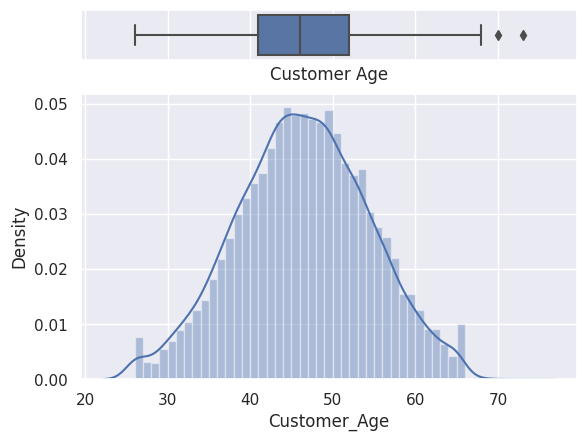

In [ ]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(x=data["Customer_Age"], ax=ax_box)
#since the data of customer age is x label wise so plotting above it will be as per x
#so boxplot will be of customer age and to create it horizontal boxplot we can pass data to x. so added x=
sns.distplot(data["Customer_Age"], ax=ax_hist)
ax_box.set(xlabel='Customer Age')
plt.show()

### Q1.1 Credit_Limit Distribution
Create a boxplot stacked on top of a density distribution plot for 'Credit_Limit.' Comment on what this chart indicates.

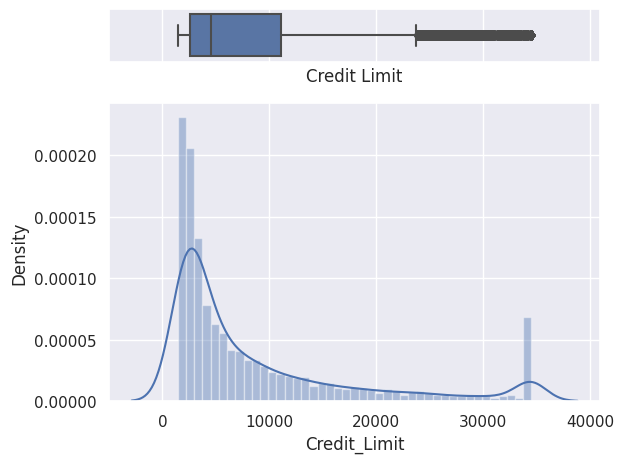

In [ ]:
# Create a 2-part figure with shared x-axis
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part (boxplot)
sns.boxplot(x=data["Credit_Limit"], ax=ax_box)

# define a density distribution plot of 'Credit_Limit' on the bottom part of the figure
sns.distplot(data["Credit_Limit"], ax=ax_hist)

# Set the x-axis label to 'Credit Limit'
ax_box.set(xlabel='Credit Limit')

# Adjust subplot parameters for better visibility
plt.tight_layout()

# Display the figure
plt.show()


In this graph, two prominent peaks are clearly visible above the rest of the data points. The graph exhibits significant variation, with the highest and lowest points appearing at the start and end of the graph respectively. The data appears to be divided into two primary groups, one with less constraints and another with more.

### Q1.2 Total_Trans_Ct Distribution
Create a boxplot stacked on top of a density distribution plot for 'Total_Trans_Ct.' Comment on what this chart indicates.

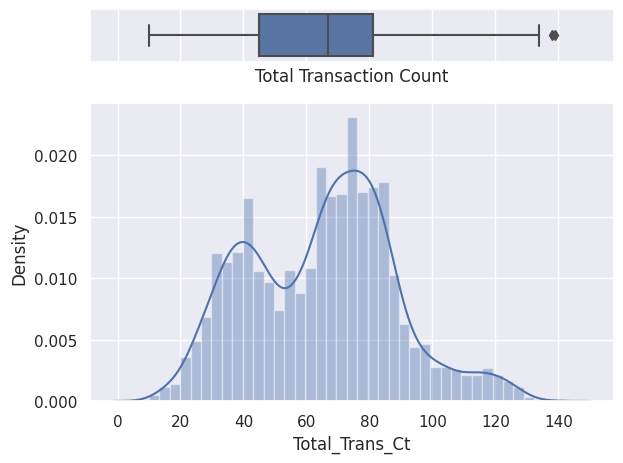

In [ ]:
# Create a 2-part figure with shared x-axis
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part (boxplot)
sns.boxplot(x=data["Total_Trans_Ct"], ax=ax_box)

# plotting density distribution plot of 'Total_Trans_Ct' on the bottom part of the figure
sns.distplot(data["Total_Trans_Ct"], ax=ax_hist)

# Set the x-axis label to 'Total Transaction Count'
ax_box.set(xlabel='Total Transaction Count')

# Adjust subplot parameters for better visibility
plt.tight_layout()

# Display the figure
plt.show()


The graph suggests a potential overlap between two groups, as indicated by the presence of two closely situated peaks. This gives the data a bimodal appearance, implying the existence of two distinct subgroups. The proximity of these peaks might suggest a connection or shared characteristics between these two groups. Additionally, it's important to note that the majority of transactions recorded fall within the range of 60 to 80, suggesting that most customers have a transaction count within this range.

### Q1.3 Observations on Total_Trans_Amt
Create a boxplot stacked on top of a density distribution plot for 'Total_Trans_Amt.' Comment on what this chart indicates.

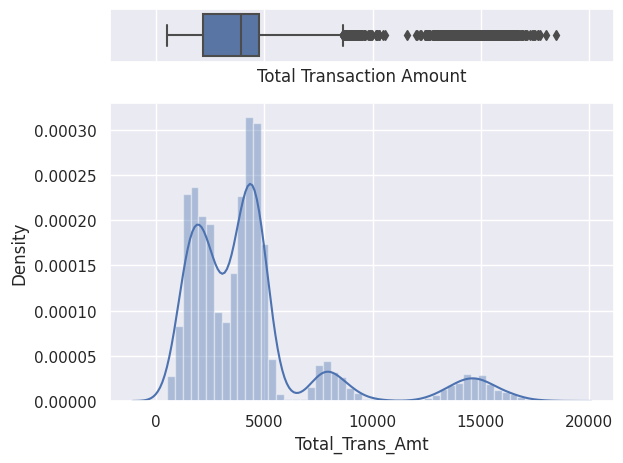

In [ ]:
# Create a 2-part figure with shared x-axis
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Create a boxplot of 'Total_Trans_Amt' on the top part of the figure
sns.boxplot(x=data["Total_Trans_Amt"], ax=ax_box)

# Create a density distribution plot of 'Total_Trans_Amt' on the bottom part of the figure
sns.distplot(data["Total_Trans_Amt"], ax=ax_hist)

# Set the x-axis label to 'Total Transaction Amount'
ax_box.set(xlabel='Total Transaction Amount')

# Adjust subplot parameters for better visibility
plt.tight_layout()

# Display the figure
plt.show()


The  following graph exhibits a multimodal distribution, as indicated by multiple peaks in the plot. The presence of four distinct high points suggests the existence of various subgroups or categories within the data. Rather than being randomly distributed, the data appears to be clustered within specific ranges. This pattern underscores the presence of distinct customer segments with different transaction behaviors.The plot highlights that most customers’ transaction amounts fall within the 0 to 5000 range. Transactions in the 10000 to 15000 and 15000 to 20000 ranges are less common and stand out as outliers due to their significant deviation from the majority.


### Q1.4 Correlation Matrix
Create a heatmap of the correlation matrix using spectral shading.

In [ ]:
# Calculate the correlation matrix
corr = data.corr()

corr

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.00000,0.01820,0.01899,0.01369,-0.15001,0.15245,0.20449,-0.02387,-0.26305,-0.00029,-0.13106,-0.16860,-0.37140,-0.29005,-0.17841
Customer_Age,0.01820,1.00000,-0.12225,0.78891,-0.01093,0.05436,-0.01845,0.00248,0.01478,0.00115,-0.06204,-0.04645,-0.06710,-0.01214,0.00711
Dependent_count,0.01899,-0.12225,1.00000,-0.10306,-0.03908,-0.01077,-0.04050,0.06806,-0.00269,0.06829,-0.03544,0.02505,0.04991,0.01109,-0.03714
Months_on_book,0.01369,0.78891,-0.10306,1.00000,-0.00920,0.07416,-0.01077,0.00751,0.00862,0.00673,-0.04896,-0.03859,-0.04982,-0.01407,-0.00754
Total_Relationship_Count,-0.15001,-0.01093,-0.03908,-0.00920,1.00000,-0.00368,0.05520,-0.07139,0.01373,-0.07260,0.05012,-0.34723,-0.24189,0.04083,0.06766
Months_Inactive_12_mon,0.15245,0.05436,-0.01077,0.07416,-0.00368,1.00000,0.02949,-0.02039,-0.04221,-0.01661,-0.03225,-0.03698,-0.04279,-0.03899,-0.00750
Contacts_Count_12_mon,0.20449,-0.01845,-0.04050,-0.01077,0.05520,0.02949,1.00000,0.02082,-0.05391,0.02565,-0.02445,-0.11277,-0.15221,-0.09500,-0.05547
Credit_Limit,-0.02387,0.00248,0.06806,0.00751,-0.07139,-0.02039,0.02082,1.00000,0.04249,0.99598,0.01281,0.17173,0.07593,-0.00202,-0.48297
Total_Revolving_Bal,-0.26305,0.01478,-0.00269,0.00862,0.01373,-0.04221,-0.05391,0.04249,1.00000,-0.04717,0.05817,0.06437,0.05606,0.08986,0.62402
Avg_Open_To_Buy,-0.00029,0.00115,0.06829,0.00673,-0.07260,-0.01661,0.02565,0.99598,-0.04717,1.00000,0.00759,0.16592,0.07089,-0.01008,-0.53881


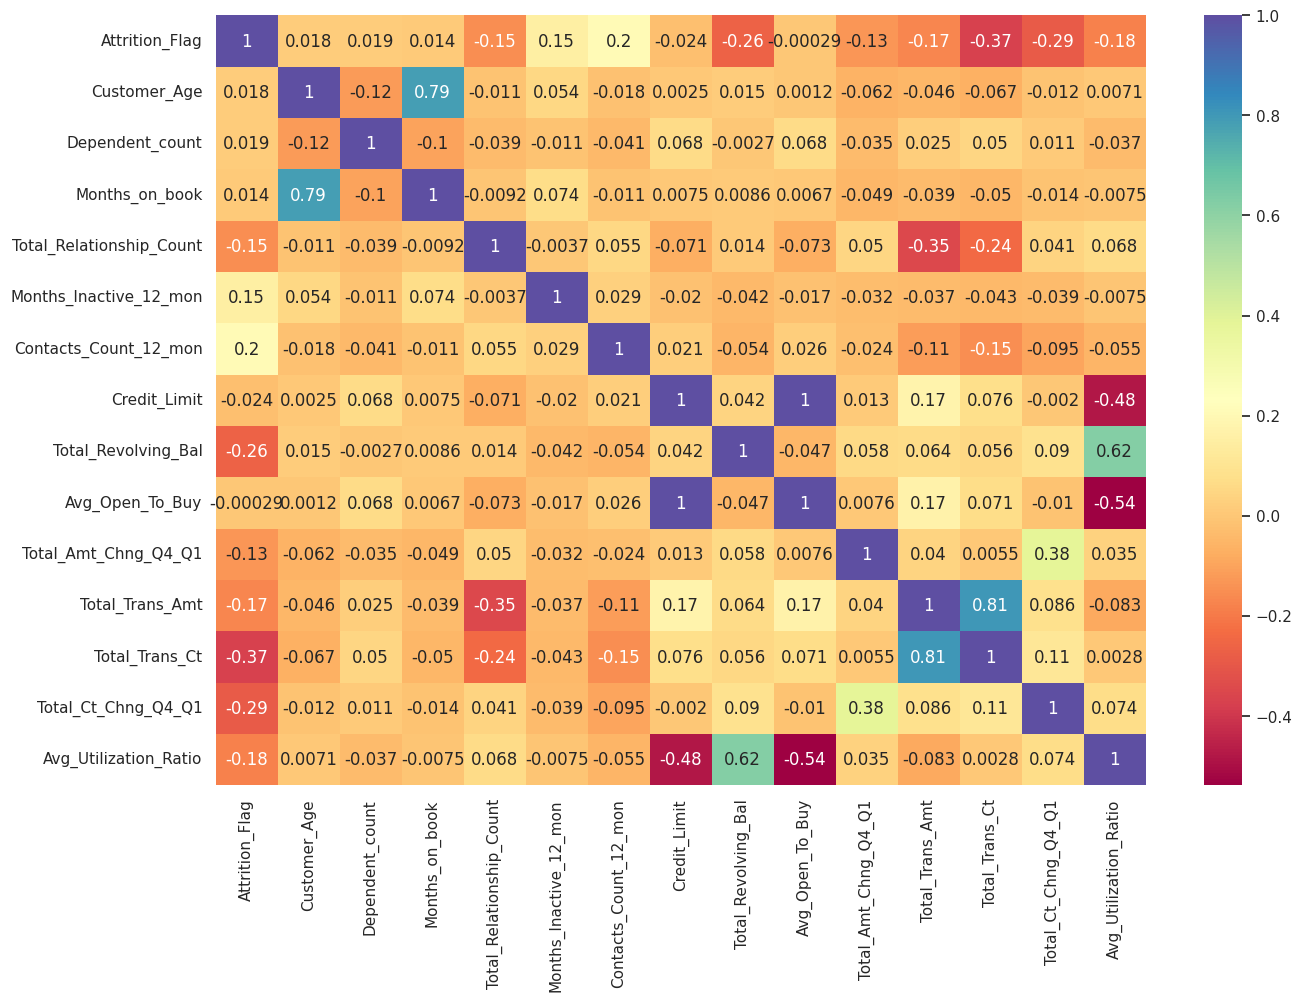

In [ ]:
# Create a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='Spectral', annot=True)

plt.show()

### Q1.5 Attrition_Flag vs Income_Category
Create barchart to visualize 'Income_Category' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

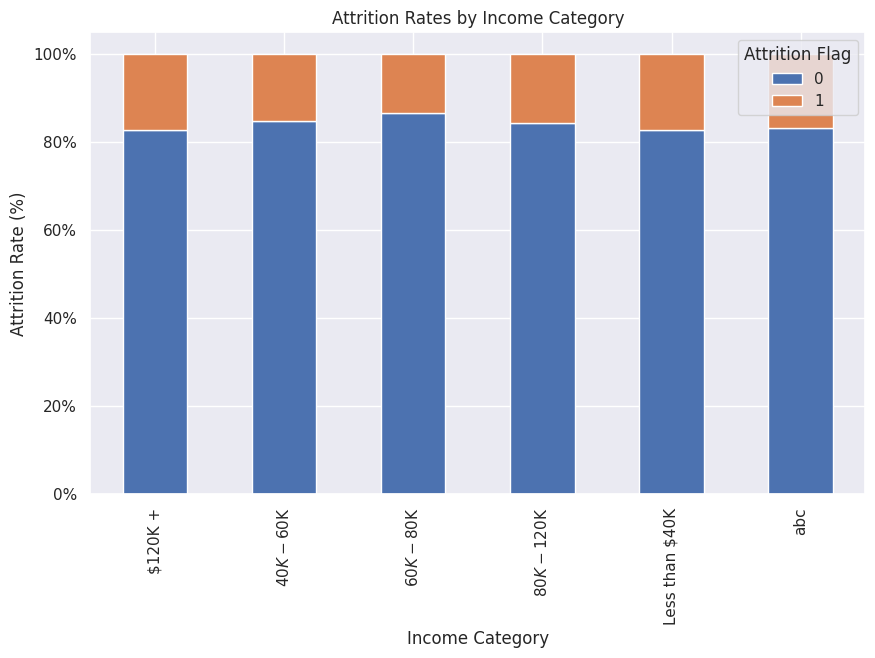

In [ ]:
# Calculate attrition rates
attrition_rates = data.groupby(['Income_Category', 'Attrition_Flag']).size().unstack(fill_value=0)
attrition_rates = attrition_rates.div(attrition_rates.sum(axis=1), axis=0)

# Plot
ax = attrition_rates.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Attrition Rates by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Attrition Rate (%)')

# Adjust y-axis labels to display as percentage
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.legend(title='Attrition Flag')

plt.show()


Despite varying income levels, the attrition rate across all categories remains consistently below 20%. This suggests a remarkable consistency in customer retention across diverse income segments. It’s a testament to the effectiveness of customer engagement strategies that are able to maintain a high retention rate irrespective of the customer’s income category.

### Q1.6 Attrition_Flag vs Card_Category
Create barchart to visualize 'Card_Category' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

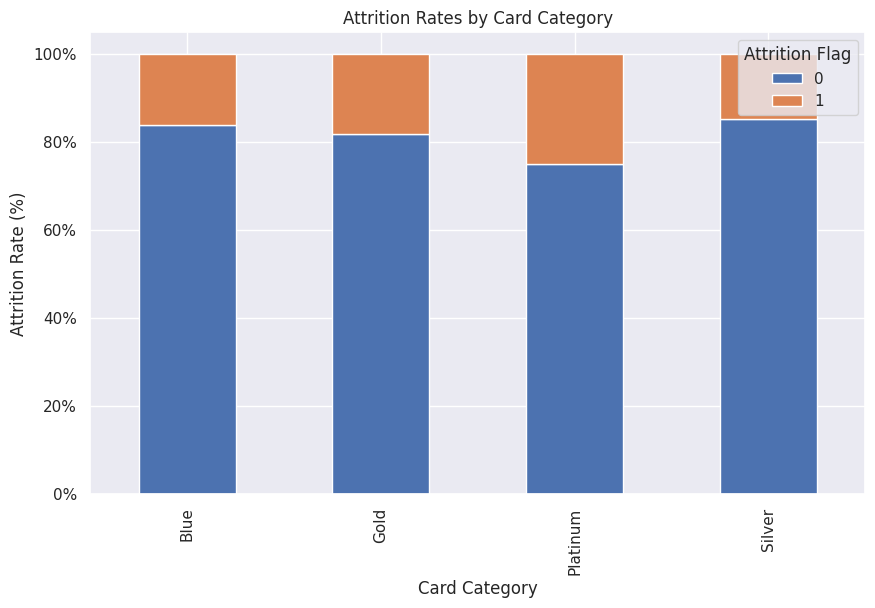

In [ ]:
# Calculate attrition rates
attrition_rates = data.groupby(['Card_Category', 'Attrition_Flag']).size().unstack(fill_value=0)
attrition_rates = attrition_rates.div(attrition_rates.sum(axis=1), axis=0)

# Plot
ax = attrition_rates.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Attrition Rates by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Attrition Rate (%)')

# Adjust y-axis labels to display as percentage
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.legend(title='Attrition Flag')

plt.show()


Based on the chart, it appears that customers in the Silver card category are least likely to attrite when compared to other categories. On the other hand, customers in the Platinum card category exhibit the highest propensity for attrition.

### Q1.7 Attrition_Flag vs Months_Inactive_12_mon
Create barchart to visualize 'Months_Inactive_12_mon' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

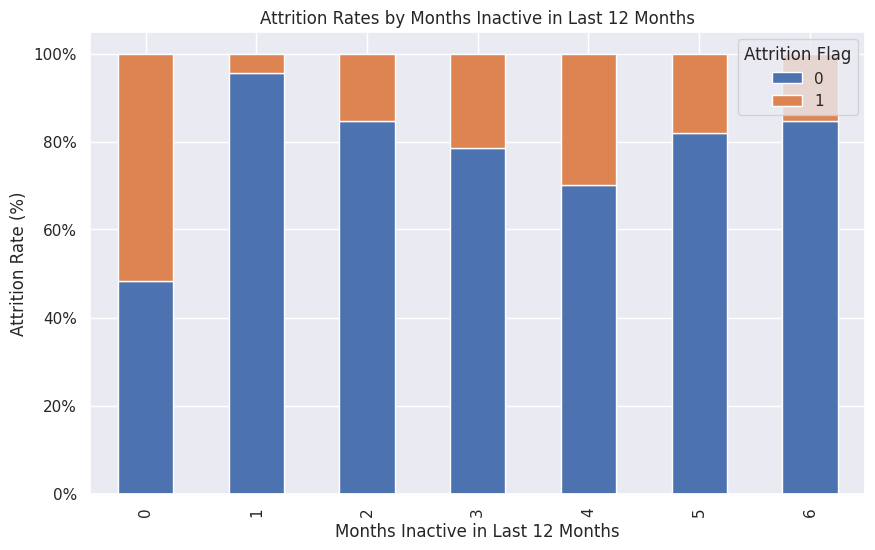

In [ ]:
# Calculate attrition rates
attrition_rates = data.groupby(['Months_Inactive_12_mon', 'Attrition_Flag']).size().unstack(fill_value=0)
attrition_rates = attrition_rates.div(attrition_rates.sum(axis=1), axis=0)

# Plot
ax = attrition_rates.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Attrition Rates by Months Inactive in Last 12 Months')
plt.xlabel('Months Inactive in Last 12 Months')
plt.ylabel('Attrition Rate (%)')

# Adjust y-axis labels to display as percentage
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.legend(title='Attrition Flag')

plt.show()


The graph distinctly illustrates that customers who did not utilize the service in the preceding month exhibit the maximum attrition rate, while those who did show the minimum rate of attrition. Furthermore, when juxtaposed with other durations, customers who remained inactive for a span of four months demonstrate a relatively higher attrition rate.

## Data Preparation

### Outlier Analysis

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Attrition_Flag             16.06596
Customer_Age                0.01975
Dependent_count             0.00000
Months_on_book              3.81159
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      3.26849
Contacts_Count_12_mon       6.21112
Credit_Limit                9.71660
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             9.50923
Total_Amt_Chng_Q4_Q1        3.91034
Total_Trans_Amt             8.84764
Total_Trans_Ct              0.01975
Total_Ct_Chng_Q4_Q1         3.89059
Avg_Utilization_Ratio       0.00000
dtype: float64

### Missing Value Imputation
- We will first replace 'abc' values with 'np.nan' in Income_Category
- We will impute missing values in all 3 columns using mode

In [ ]:
data1 = data.copy()

In [ ]:
data1["Income_Category"].replace("abc", np.nan, inplace=True)

In [ ]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Values have been replaced.

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3815
Single      2771
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3815
Single      2771
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


### Encoding Categorical Variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


* After encoding there are 29 columns.

In [ ]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
4124,50,1,43,6,1,2,7985.00000,0,7985.00000,1.03200,3873,72,0.67400,0.00000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4686,50,0,36,3,3,2,5444.00000,2499,2945.00000,0.46800,4509,80,0.66700,0.45900,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1276,26,0,13,6,3,4,1643.00000,1101,542.00000,0.71300,2152,50,0.47100,0.67000,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
6119,65,0,55,3,3,0,2022.00000,0,2022.00000,0.57900,4623,65,0.54800,0.00000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2253,46,3,35,6,3,4,4930.00000,0,4930.00000,1.01900,3343,77,0.63800,0.00000,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0


## Model Building

### Q2.1 Model Evaluation Criterion
What 2 cases of predictions can the model predict incorrectly? Which case is more important? What does this mean for recall and false negatives (increasing or decreasing)?

The model can make two types of incorrect predictions:
1. Predicting an employee will leave when the employee doesn't leave
2. Predicting an employee will stay when the employee actually leaves

The scenario where the model predicts that an employee will stay, but the employee actually leaves, is a significant concern. This is because losing a valuable employee is a major setback for any attrition prediction model, making this the more critical type of incorrect prediction.

In this context, the company would want to maximize Recall because a higher Recall reduces the chances of false negatives. Therefore, the emphasis should be on increasing Recall (reducing false negatives), or in other words, accurately identifying true positives (i.e., Class 1). This allows the company to implement incentives to manage attrition rates, particularly for top performers. This strategy would aid in optimizing overall project costs by retaining the best talent.

### Q2.2 Logistic Regression
Train a logistic regression model using all predictors.

In [ ]:
#fitting logistic regression model
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

### Q2.3 Evaluation Metrics
Create a function to calculate and print the classification report and confusion matrix.

In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Q2.4 Check Performance on Training Data
Check the performance on your training data using the function you created. Comment on what your class of interest is, and how to read the confusion matrix.

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5949
           1       0.69      0.44      0.53      1139

    accuracy                           0.88      7088
   macro avg       0.79      0.70      0.73      7088
weighted avg       0.87      0.88      0.87      7088



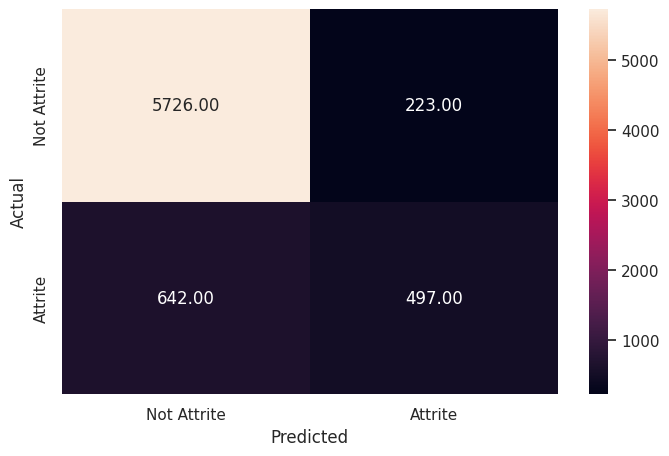

In [ ]:
#checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

Our aim is to maximize the true positives and true negatives (i.e., correct predictions) while minimizing the false positives and false negatives (i.e., incorrect predictions). In this case, we specifically want to minimize false negatives because these represent customers who churned but were not identified by the model

### Q2.5 Check Performance on Test Data
Check the performance on your test data using the function you created.

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2551
           1       0.70      0.44      0.54       488

    accuracy                           0.88      3039
   macro avg       0.80      0.70      0.74      3039
weighted avg       0.87      0.88      0.87      3039



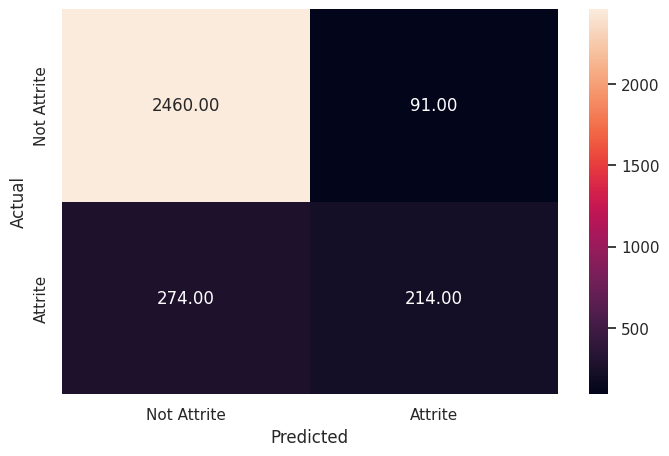

In [ ]:
#checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

### Q2.6 Comments on Performance
Comment on the accuracy of your train and test dataset. What is the recall for this model? What does the recall indicate on the overall model performance? Does this model identify the majority of the customers who wiill attrite?


The model's accuracy of 0.88 for both the training and testing datasets suggests that it's performing well overall and is not overfitting. However, the recall of 0.44 indicates that the model is only correctly identifying 44% of customers who will attrite. This means that more than half of the customers who will attrite are being missed, leading to a high number of false negatives. Depending on the specific requirements of your project, you might want to consider strategies to improve recall, even if it might decrease precision. So, based on the current recall value, it appears that this model does not identify the majority of customers who will attrite. It's identifying less than half of those customers correctly.

## Performance Evaluation

### Q3.1 Evaluate Predictors
Print the coefficients of the logistic regression and comment on which variables are leading to attrition.

In [ ]:
#printing the coefficients of logistic regression
cols=X_train.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
Contacts_Count_12_mon,0.31531
Months_Inactive_12_mon,0.24919
Dependent_count,0.20002
Customer_Age,0.11755
Income_Category_Less than $40K,0.05269
Marital_Status_Single,0.04579
Education_Level_Graduate,0.01085
Education_Level_Post-Graduate,0.00870
Education_Level_Doctorate,0.00737
Education_Level_Uneducated,0.00455


The variables Contacts_Count_12_mon, Months_Inactive_12_mon, and Dependent_count are most strongly leading to attrition. Conversely, Total_Relationship_Count, Total_Trans_Ct, and Months_on_book are most strongly leading to retention.

### Q3.2 Odds Calculation
Convert the coefficients of the logistic regression model to odds. Comment on the odds of customer attrition when it comes to contacting the bank, being inactive, and being dependent.

In [ ]:
odds = np.exp(lg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
Contacts_Count_12_mon,1.37069
Months_Inactive_12_mon,1.28299
Dependent_count,1.22143
Customer_Age,1.12474
Income_Category_Less than $40K,1.05410
Marital_Status_Single,1.04686
Education_Level_Graduate,1.01091
Education_Level_Post-Graduate,1.00874
Education_Level_Doctorate,1.00739
Education_Level_Uneducated,1.00456


The frequency of customer interactions over the past year and the duration of customer inactivity both significantly influence the probability of a customer leaving. More interactions tend to increase attrition risk, while more inactive months tend to reduce it. Furthermore, an increase in the number of dependents a customer has is associated with a lower likelihood of them leaving. This suggests that customers who have recently been active and in touch with the bank, as well as those with more dependents, are less likely to churn.

### Q3.3 Precision-Recall Curve
Create a precision-recall curve for your logistic regression model.

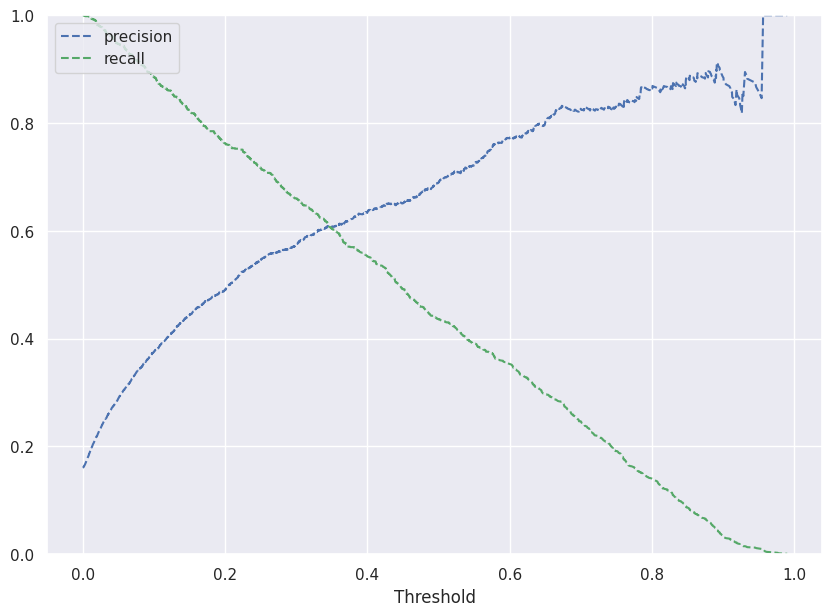

In [ ]:
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

### Q3.4 Threshold Calculation
Calculate the threshold where precision and recall are equal.

In [ ]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.34806960434560535


### Q3.5 Re-Evaluate Performance on Training Data
Re-evaluate your model on the training data using the identified optimal threshold. Comment on the model performance.

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5949
           1       0.61      0.61      0.61      1139

    accuracy                           0.87      7088
   macro avg       0.77      0.77      0.77      7088
weighted avg       0.87      0.87      0.87      7088



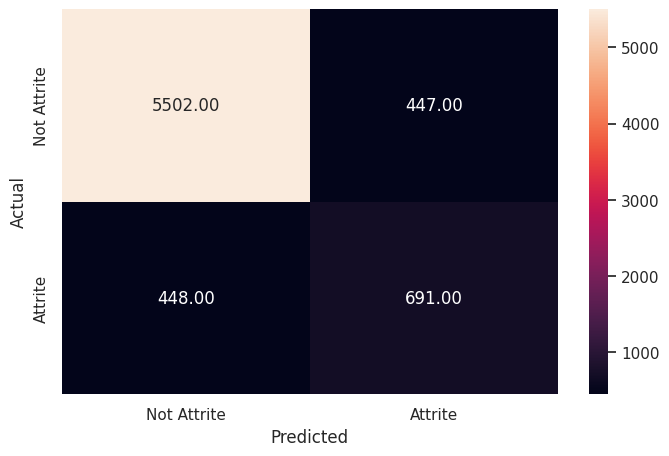

In [ ]:
optimal_threshold1=0.34806960434560535
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

The model has an accuracy of 87% and shows superior performance for class 0 with a precision, recall, and F1-score of 92%. For class 1, these metrics are at 61%. The model's ability to correctly identify positive instances improved after threshold optimization, as evidenced by the decrease in false negatives from 642 to 448. However, the imbalanced dataset could potentially impact the model's performance.

### Q3.6 Re-Evaluate Performance on Test Data
Re-evaluate your model on the test data using the identified optimal threshold. Comment on the model performance. How does the model's performance compare to the model prior to adjusting the threshold?

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2551
           1       0.62      0.60      0.61       488

    accuracy                           0.88      3039
   macro avg       0.77      0.77      0.77      3039
weighted avg       0.87      0.88      0.88      3039



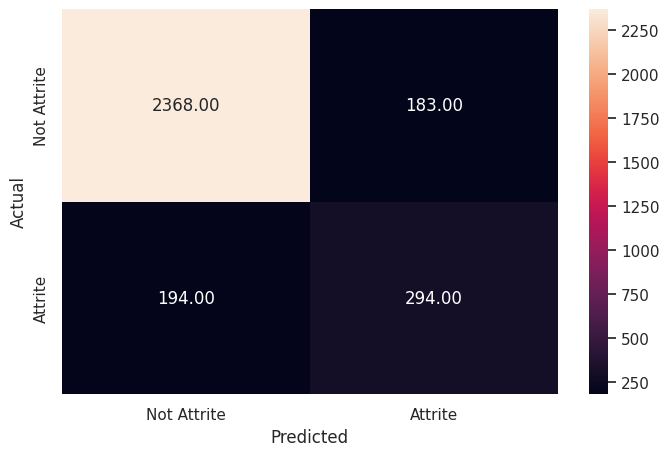

In [ ]:
optimal_threshold1=0.34806960434560535
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

The model has seen substantial improvement in recall and a decrease in false negatives from 274 to 194. This suggests that the model has improved in accurately identifying positive instances, thereby enhancing its overall performance. The precision remains high for class 0 at 92%, while it stands at 62% for class 1. These changes indicate that the model has become more balanced in predicting both classes after adjusting the threshold.